In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [52]:
df = pd.read_csv("economic_analysis_data.csv")

In [53]:
df.shape

(50, 7)

In [54]:
df.head()

,date,Country,GDP,Unemployment Rate,Inflation Rate,Exports,Current Account Balance
0,2000-01-01,Brazil,6.554482e+11,10.892,52.531583,NaN,-2.653085e+10
1,2000-01-01,India,4.683955e+11,7.856,54.338322,NaN,-4.601249e+09
2,2001-01-01,Brazil,5.599836e+11,10.649,56.124932,NaN,-2.489008e+10
3,2001-01-01,India,4.854401e+11,8.039,56.391926,NaN,1.410182e+09
4,2002-01-01,Brazil,5.097953e+11,10.641,60.867581,NaN,-9.407043e+09


In [55]:
df['Exports'].value_counts()

Series([], Name: count, dtype: int64)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     50 non-null     object 
 1   Country                  50 non-null     object 
 2   GDP                      50 non-null     float64
 3   Unemployment Rate        50 non-null     float64
 4   Inflation Rate           50 non-null     float64
 5   Exports                  0 non-null      float64
 6   Current Account Balance  50 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


In [57]:
df = df.drop(columns=['Exports'])

In [58]:
print(df.isnull().sum())

date                       0
Country                    0
GDP                        0
Unemployment Rate          0
Inflation Rate             0
Current Account Balance    0
dtype: int64


In [59]:
df.describe()

,GDP,Unemployment Rate,Inflation Rate,Current Account Balance
count,5.000000e+01,50.000000,50.000000,5.000000e+01
mean,1.645959e+12,9.623340,122.226682,-3.189883e+10
std,8.530010e+11,4.328691,50.718314,3.280119e+10
min,3.777816e+11,4.172000,52.531583,-1.104932e+11
25%,8.381963e+11,7.867750,75.708888,-5.316758e+10
50%,1.745774e+12,8.415000,115.817044,-2.876799e+10
75%,2.200045e+12,10.431250,164.431755,-6.626337e+09
max,3.549919e+12,28.838000,216.862025,3.273005e+10


In [60]:
# list of countries
print(df['Country'].unique())

['Brazil' 'India' 'South Africa']


In [61]:
print(df['date'].unique())

['2000-01-01' '2001-01-01' '2002-01-01' '2003-01-01' '2004-01-01'
 '2005-01-01' '2006-01-01' '2007-01-01' '2008-01-01' '2009-01-01'
 '2010-01-01' '2011-01-01' '2012-01-01' '2013-01-01' '2014-01-01'
 '2015-01-01' '2016-01-01' '2017-01-01' '2018-01-01' '2019-01-01'
 '2020-01-01' '2021-01-01' '2022-01-01' '2023-01-01']


In [62]:
import seaborn as sns

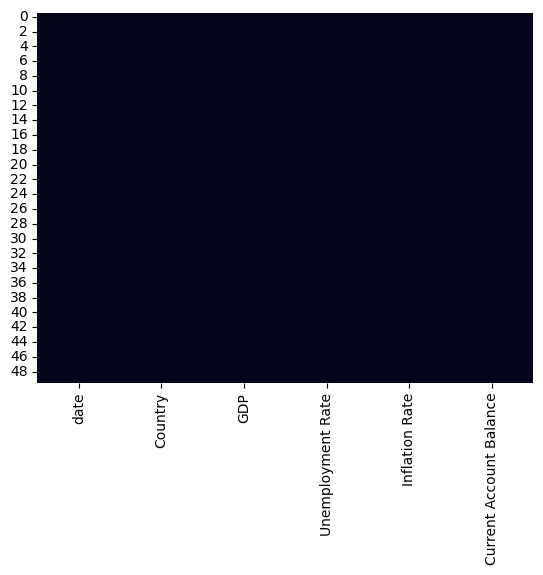

In [63]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

So there is no such NULL values

In [64]:
# extracting the year
df['Year'] = pd.to_datetime(df['date']).dt.year

In [65]:
df['Year'].head()

0    2000
1    2000
2    2001
3    2001
4    2002
Name: Year, dtype: int32

In [66]:
df['Year'].value_counts()

Year
2023    3
2022    3
2001    2
2021    2
2020    2
2019    2
2018    2
2017    2
2016    2
2015    2
2014    2
2013    2
2000    2
2011    2
2010    2
2009    2
2008    2
2007    2
2006    2
2005    2
2004    2
2003    2
2002    2
2012    2
Name: count, dtype: int64

In [67]:
indicators = ['GDP', 'Unemployment Rate', 'Inflation Rate', 'Current Account Balance']

# Descriptive statistics per country and indicator
for col in indicators:
    print(f'Descriptive stats for {col}:')
    print(df.groupby('Country')[col].describe())
    print('\n')

Descriptive stats for GDP:
              count          mean           std           min           25%  \
Country                                                                       
Brazil         24.0  1.610627e+12  6.756366e+11  5.097953e+11  1.053628e+12   
India          24.0  1.785827e+12  9.669927e+11  4.683955e+11  9.102909e+11   
South Africa    2.0  3.915262e+11  1.943783e+10  3.777816e+11  3.846539e+11   

                       50%           75%           max  
Country                                                 
Brazil        1.745774e+12  2.091053e+12  2.616156e+12  
India         1.825345e+12  2.657319e+12  3.549919e+12  
South Africa  3.915262e+11  3.983985e+11  4.052709e+11  


Descriptive stats for Unemployment Rate:
              count       mean       std     min       25%      50%       75%  \
Country                                                                         
Brazil         24.0   9.955208  2.002917   6.755   8.38500   9.8820  11.27175   
India 

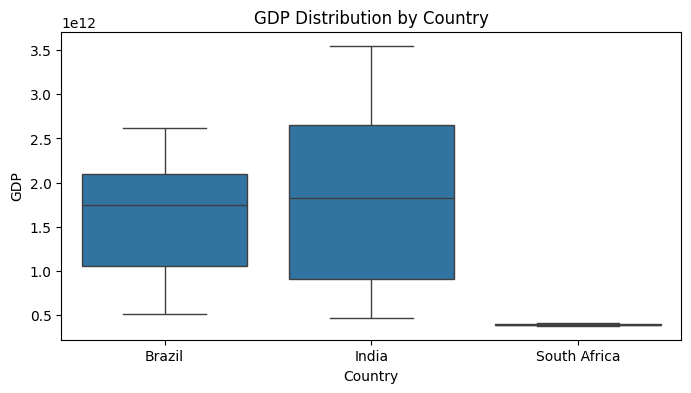

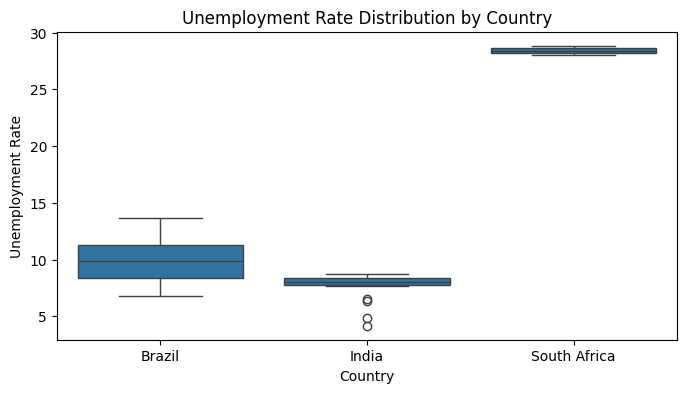

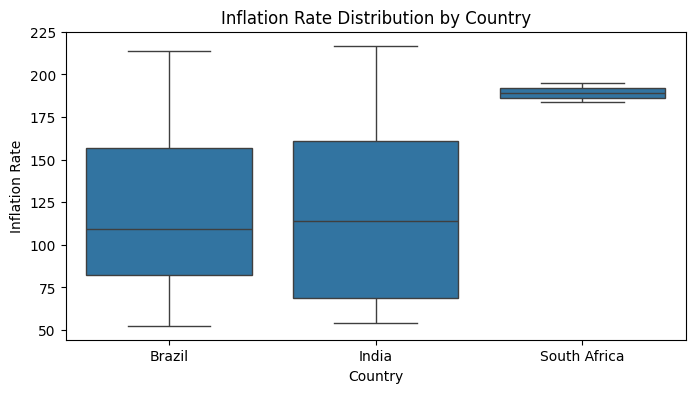

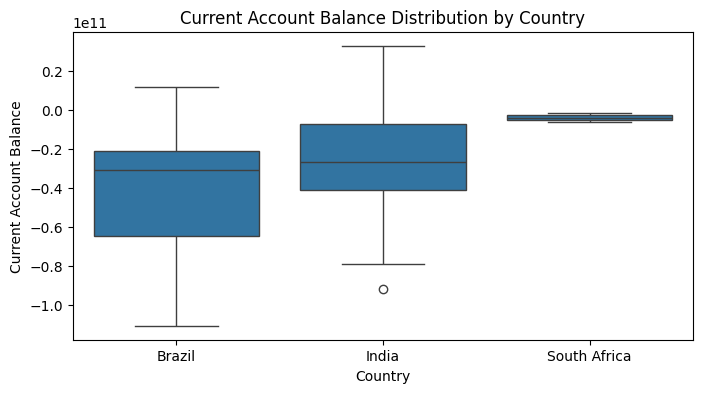

In [68]:
for col in indicators:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Country', y=col, data=df)
    plt.title(f'{col} Distribution by Country')
    plt.show()

In [69]:
import plotly.express as px
fig = px.line(df, x='date', y='GDP', color='Country', markers=True,
              title='GDP Over Time by Country')
fig.show()

In [70]:
for col in ['Unemployment Rate', 'Inflation Rate', 'Current Account Balance']:
    fig = px.line(df, x='date', y=col, color='Country', markers=True,
                  title=f'{col} Over Time by Country')
    fig.show()

In [71]:
df['date'].dtype

dtype('O')

In [72]:
bins = [1999, 2005, 2010, 2015, 2020, 2025]
labels = ['2000-2005', '2006-2010', '2011-2015', '2016-2020', '2021-2023']

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['Year'] = df['date'].dt.year
df['Period'] = pd.cut(df['Year'], bins=bins, labels=labels)

period_summary = df.groupby(['Country', 'Period'])[['GDP', 'Unemployment Rate', 'Inflation Rate', 'Current Account Balance']].mean().reset_index()
print(period_summary)

         Country     Period           GDP  Unemployment Rate  Inflation Rate  \
0         Brazil  2000-2005  6.407307e+11          10.662333       65.553764   
1         Brazil  2006-2010  1.615286e+12           9.016600       90.945942   
2         Brazil  2011-2015  2.362492e+12           7.438600      120.744586   
3         Brazil  2016-2020  1.825108e+12          12.467000      161.539469   
4         Brazil  2021-2023  1.932079e+12          10.113333      201.824894   
5          India  2000-2005  6.010020e+11           8.298000       59.999418   
6          India  2006-2010  1.274679e+12           8.471600       82.804358   
7          India  2011-2015  1.930025e+12           8.070400      129.208538   
8          India  2016-2020  2.631932e+12           7.508800      166.659336   
9          India  2021-2023  3.356887e+12           5.124667      204.835664   
10  South Africa  2000-2005           NaN                NaN             NaN   
11  South Africa  2006-2010           Na

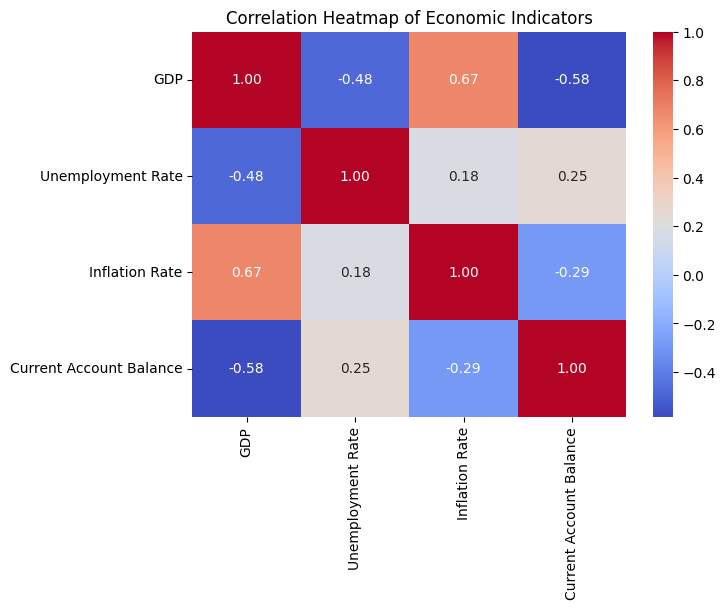

In [73]:
corr = df[['GDP', 'Unemployment Rate', 'Inflation Rate', 'Current Account Balance']].corr()

# heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Economic Indicators')
plt.show()

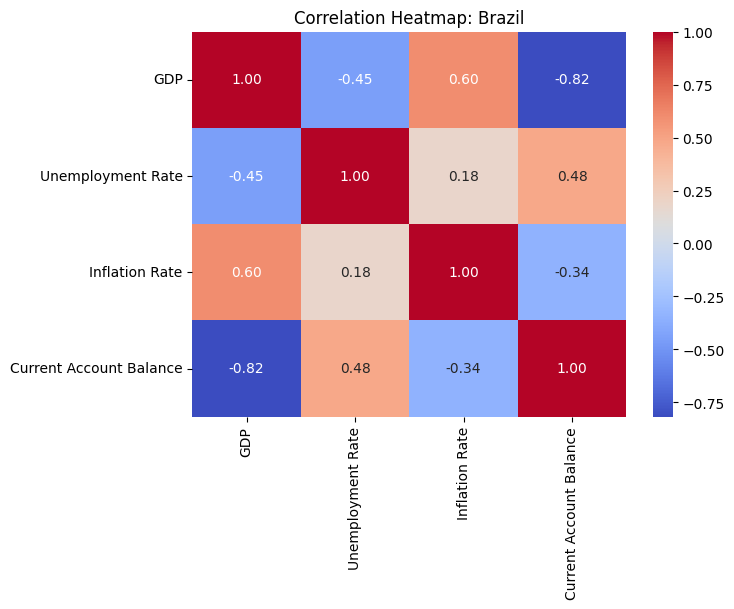

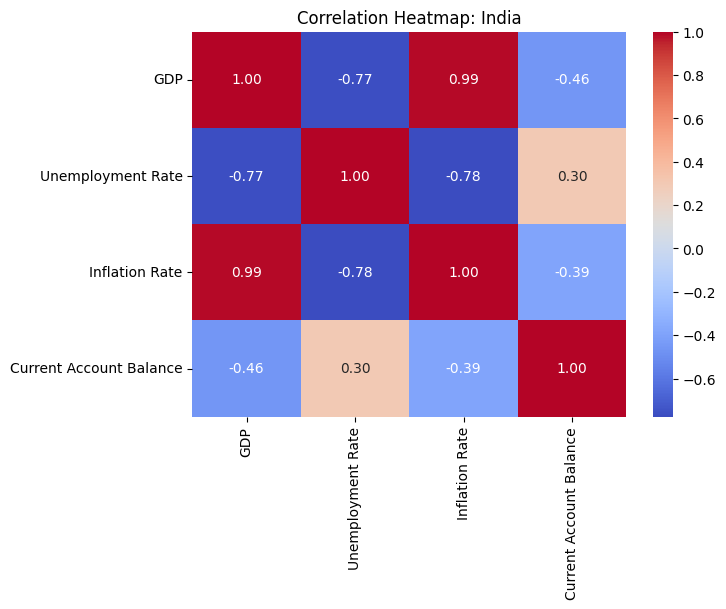

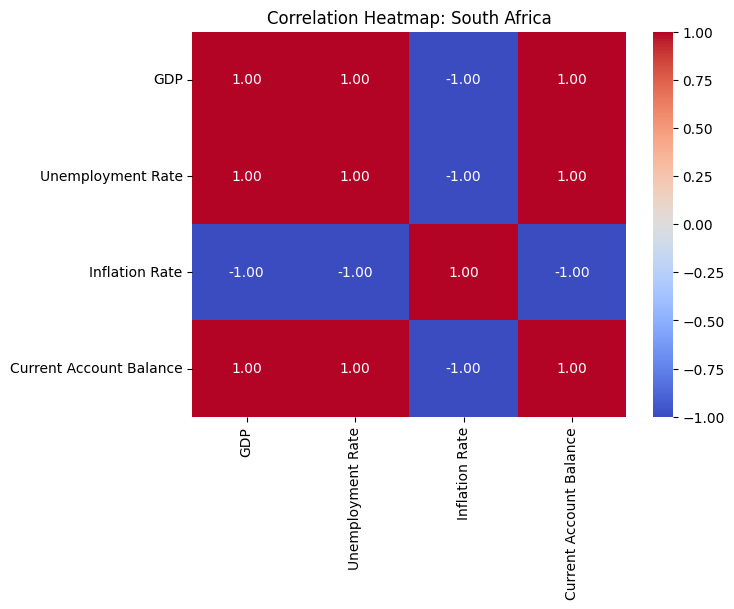

In [74]:
for country in df['Country'].unique():
    corr = df[df['Country'] == country][['GDP', 'Unemployment Rate', 'Inflation Rate', 'Current Account Balance']].corr()
    plt.figure(figsize=(7,5))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap: {country}')
    plt.show()

In [75]:
import plotly.express as px

fig = px.scatter(df, x='GDP', y='Unemployment Rate', color='Country',
                 title='GDP vs. Unemployment Rate')
fig.show()

In [76]:
fig = px.scatter(
    df,
    x='Unemployment Rate',
    y='Inflation Rate',
    color='Country',
    title='Unemployment Rate vs. Inflation Rate')
fig.show()

In [77]:
indicators = ['GDP', 'Unemployment Rate', 'Inflation Rate', 'Current Account Balance']
df = df.sort_values(['Country', 'date'])

# Year-on-Year changes
for col in indicators:
    df[f'{col}_YoY_Change'] = df.groupby('Country')[col].pct_change() * 100

In [78]:
fig = px.line(
    df, x='date', y='GDP_YoY_Change', color='Country',
    title='Year-on-Year GDP Change (%) by Country')
fig.show()

In [79]:
print("Latest values per country:")
print(df.sort_values('date').groupby('Country').tail(1)[['Country', 'date', 'GDP', 'Unemployment Rate', 'Inflation Rate', 'Current Account Balance']])

Latest values per country:
         Country       date           GDP  Unemployment Rate  Inflation Rate  \
47        Brazil 2023-01-01  2.173666e+12              7.950      213.875135   
48         India 2023-01-01  3.549919e+12              4.172      216.862025   
49  South Africa 2023-01-01  3.777816e+11             27.988      194.839466   

    Current Account Balance  
47            -3.082824e+10  
48            -3.024601e+10  
49            -6.143218e+09  


In [80]:
print("Correlation matrix for all countries combined:")
print(df[['GDP', 'Unemployment Rate', 'Inflation Rate', 'Current Account Balance']].corr())

Correlation matrix for all countries combined:
                              GDP  Unemployment Rate  Inflation Rate  \
GDP                      1.000000          -0.482954        0.674258   
Unemployment Rate       -0.482954           1.000000        0.179941   
Inflation Rate           0.674258           0.179941        1.000000   
Current Account Balance -0.583239           0.251766       -0.288238   

                         Current Account Balance  
GDP                                    -0.583239  
Unemployment Rate                       0.251766  
Inflation Rate                         -0.288238  
Current Account Balance                 1.000000  


In [81]:
for col in ['GDP', 'Unemployment Rate', 'Inflation Rate', 'Current Account Balance']:
    max_row = df.loc[df[f'{col}_YoY_Change'].idxmax()]
    min_row = df.loc[df[f'{col}_YoY_Change'].idxmin()]
    print(f"Largest positive YoY change in {col}: {max_row['Country']} {max_row['date']} {max_row[f'{col}_YoY_Change']:.2f}%")
    print(f"Largest negative YoY change in {col}: {min_row['Country']} {min_row['date']} {min_row[f'{col}_YoY_Change']:.2f}%")
    print('-' * 60)

Largest positive YoY change in GDP: Brazil 2005-01-01 00:00:00 33.22%
Largest negative YoY change in GDP: Brazil 2015-01-01 00:00:00 -26.62%
------------------------------------------------------------
Largest positive YoY change in Unemployment Rate: Brazil 2016-01-01 00:00:00 35.63%
Largest negative YoY change in Unemployment Rate: Brazil 2022-01-01 00:00:00 -29.85%
------------------------------------------------------------
Largest positive YoY change in Inflation Rate: Brazil 2003-01-01 00:00:00 14.71%
Largest negative YoY change in Inflation Rate: Brazil 2020-01-01 00:00:00 3.21%
------------------------------------------------------------
Largest positive YoY change in Current Account Balance: Brazil 2008-01-01 00:00:00 1192.88%
Largest negative YoY change in Current Account Balance: India 2005-01-01 00:00:00 -1418.07%
------------------------------------------------------------


In [82]:
for country in df['Country'].unique():
    print(f"\nMost recent 5 years for {country}:")
    print(df[df['Country'] == country].sort_values('date').tail(5)[['date', 'GDP', 'Unemployment Rate', 'Inflation Rate', 'Current Account Balance']])


Most recent 5 years for Brazil:
         date           GDP  Unemployment Rate  Inflation Rate  \
38 2019-01-01  1.873288e+12             11.936      167.397860   
40 2020-01-01  1.476107e+12             13.697      172.774291   
42 2021-01-01  1.670647e+12             13.159      187.117425   
44 2022-01-01  1.951924e+12              9.231      204.482121   
47 2023-01-01  2.173666e+12              7.950      213.875135   

    Current Account Balance  
38            -6.802168e+10  
40            -2.820755e+10  
42            -4.635779e+10  
44            -4.825288e+10  
47            -3.082824e+10  

Most recent 5 years for India:
         date           GDP  Unemployment Rate  Inflation Rate  \
39 2019-01-01  2.835606e+12              6.510      171.621576   
41 2020-01-01  2.674852e+12              7.859      182.988823   
43 2021-01-01  3.167271e+12              6.380      192.378725   
45 2022-01-01  3.353470e+12              4.822      205.266241   
48 2023-01-01  3.549919e+12 

**Insights**

- **Latest data (2023):**
  - **Brazil:** GDP dollar 2.17T, Unemployment 7.95 per cent, Inflation 213.9, CA Balance -dollar 30.8B
  - **India:** GDP dollar 3.55T, Unemployment 4.17 per cent, Inflation 216.9, CA Balance -dollar 30.2B
  - **South Africa:** GDP dollar 377.8B, Unemployment 27.99 per cent, Inflation 194.8, CA Balance -dollar 6.1B

- **Correlations:**
  - Higher GDP tends to mean lower unemployment.
  - GDP is positively linked to inflation, and negatively to current account balance.

- **Year-on-year highlights:**
  - Brazil saw the largest GDP rise (+33% in 2005) and fall (-27% in 2015).
  - India had the largest negative swing in current account balance (-1418% in 2005).
  - Unemployment in Brazil dropped sharply in 2022.

- **Insights:**
  - Brazil and India show GDP growth but face inflation and current account deficits.
  - South Africa struggles with high unemployment.

- **Recommendations:**  
  - Brazil and India: Focus on stabilizing inflation and deficits.
  - South Africa: Address persistent unemployment.


In [83]:
# Save your cleaned DataFrame
df.to_csv('brics_cleaned.csv', index=False)